##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

#### SCORES.csv

In [483]:
scores = pd.read_csv('SCORES.csv')
scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


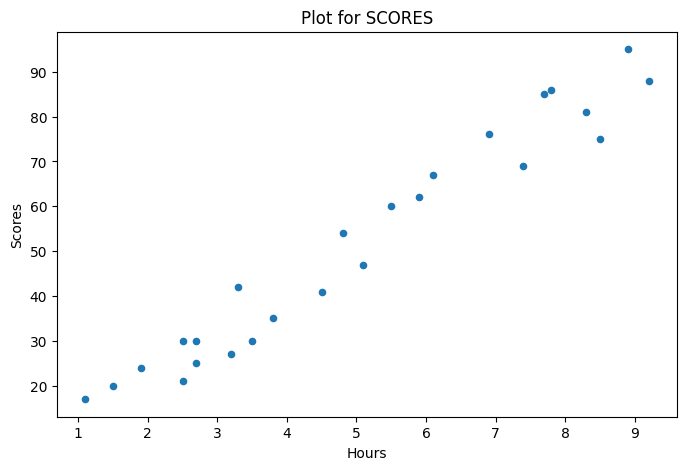

In [484]:
fig, ax = plt.subplots(figsize=(8, 5))
scores.plot.scatter(ax = ax, x = 'Hours', y='Scores')
plt.title('Plot for SCORES')
plt.show()

In [485]:
x = scores[['Hours']]
y = scores[['Scores']]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.3, random_state=0)

In [ ]:
linearRegression = linear_model.LinearRegression()
linearRegression.fit(X_train, Y_train)

In [487]:
coefficient = linearRegression.coef_
intercept = linearRegression.intercept_

coefficient, intercept

# Coefficient oznacza estymowany współczynnik kierunkowy regresji liniowej dla danych treningowych. Drugą zmienną jest intercept, jest to wyraz wolny regresji liniowej dla danych treningowych.

(array([[9.8479817]]), array([1.09792635]))

In [488]:
Y_prediction = linearRegression.predict(X_test)

compareDataFrame = pd.DataFrame({
'Predykcja' : Y_prediction.squeeze(),
'Dane' : Y_test.to_numpy().squeeze(),
'Różnica' : np.abs(Y_prediction.squeeze() - Y_test.to_numpy().squeeze())
})

compareDataFrame.head()

,Predykcja,Dane,Różnica
0,15.869899,20,4.130101
1,32.611468,27,5.611468
2,73.972991,69,4.972991
3,25.717881,30,4.282119
4,59.201018,62,2.798982


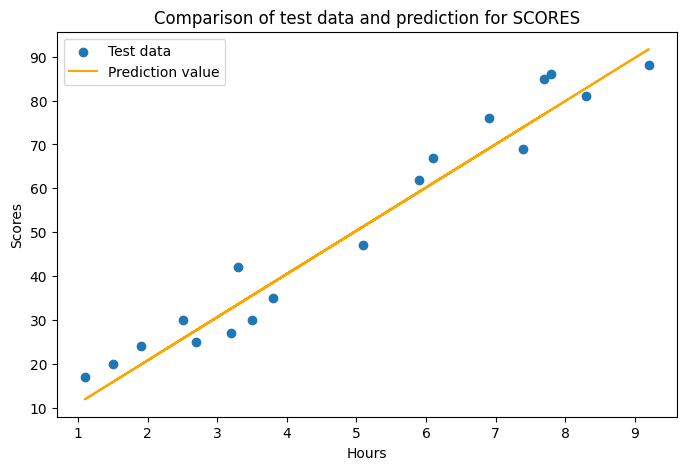

In [489]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(X_test, Y_test.to_numpy())
plt.plot(X_test, Y_prediction, 'orange')
ax.set_xlabel('Hours')
ax.set_ylabel('Scores')
ax.set_title('Comparison of test data and prediction for SCORES')
ax.legend(['Test data', 'Prediction value'])
plt.show()

In [490]:
meanAbsoluteError = mean_absolute_error(Y_test.to_numpy().squeeze(), Y_prediction.squeeze())
meanSquaredError = mean_squared_error(Y_test.to_numpy().squeeze(), Y_prediction.squeeze())
sqrtMeanSquaredError = np.sqrt(meanSquaredError)

compareDataFrame = pd.DataFrame({
'Średni błąd bezwzględny' : meanAbsoluteError,
'Błąd średniokwadratowy' : meanSquaredError,
'Pierwiastek błędu średniokwadratowego' : sqrtMeanSquaredError
}, index=[0])

compareDataFrame

,Średni błąd bezwzględny,Błąd średniokwadratowy,Pierwiastek błędu średniokwadratowego
0,5.001787,28.47475,5.336174


#### SBP.csv

In [491]:
sbp = pd.read_csv('SBP.csv')
sbp.head()

,Age,SBP
0,60,117
1,61,120
2,74,145
3,57,129
4,63,132


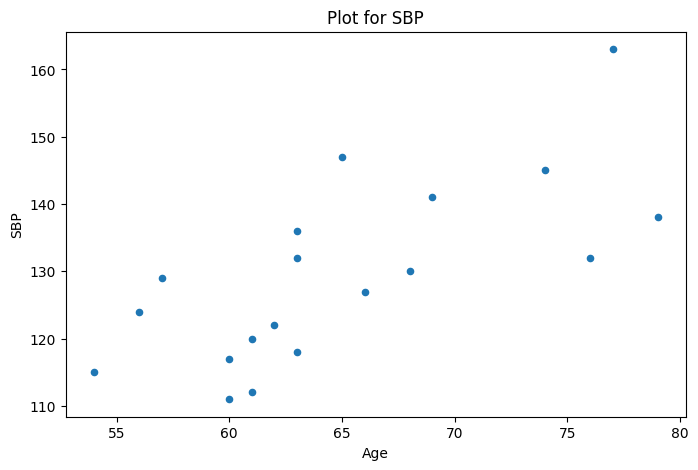

In [492]:
fig, ax = plt.subplots(figsize=(8, 5))
sbp.plot.scatter(ax = ax, x = 'Age', y='SBP')
plt.title('Plot for SBP')
plt.show()

In [493]:
x = sbp[['Age']]
y = sbp[['SBP']]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.3, random_state=0)

In [ ]:
linearRegression = linear_model.LinearRegression()
linearRegression.fit(X_train, Y_train)

In [495]:
coefficient = linearRegression.coef_
intercept = linearRegression.intercept_

coefficient, intercept

(array([[0.79344729]]), array([72.71509972]))

In [496]:
Y_prediction = linearRegression.predict(X_test)

compareDataFrame = pd.DataFrame({
'Predykcja' : Y_prediction.squeeze(),
'Dane' : Y_test.to_numpy().squeeze(),
'Różnica' : np.abs(Y_prediction.squeeze() - Y_test.to_numpy().squeeze())
})

compareDataFrame.head()

,Predykcja,Dane,Różnica
0,122.702279,118,4.702279
1,121.115385,120,1.115385
2,122.702279,136,13.297721
3,121.908832,122,0.091168
4,124.289174,147,22.710826


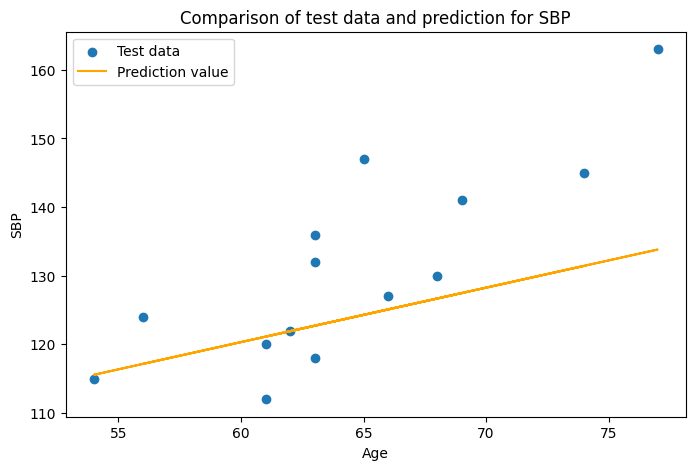

In [497]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(X_test, Y_test.to_numpy())
plt.plot(X_test, Y_prediction, 'orange')
ax.set_xlabel('Age')
ax.set_ylabel('SBP')
ax.set_title('Comparison of test data and prediction for SBP')
ax.legend(['Test data', 'Prediction value'])
plt.show()

In [498]:
meanAbsoluteError = mean_absolute_error(Y_test.to_numpy().squeeze(), Y_prediction.squeeze())
meanSquaredError = mean_squared_error(Y_test.to_numpy().squeeze(), Y_prediction.squeeze())
sqrtMeanSquaredError = np.sqrt(meanSquaredError)

compareDataFrame = pd.DataFrame({
'Średni błąd bezwzględny' : meanAbsoluteError,
'Błąd średniokwadratowy' : meanSquaredError,
'Pierwiastek błędu średniokwadratowego' : sqrtMeanSquaredError
}, index=[0])

compareDataFrame

# Wyniki uzyskane dla SBP nie są tak zadowalające, jak te uzyskane dla SCORES. Przyczyną takiego stanu rzeczy jest przede wszystkim zdecydowanie większy rozrzut danych oraz zbyt mały zbiór treningowy.

,Średni błąd bezwzględny,Błąd średniokwadratowy,Pierwiastek błędu średniokwadratowego
0,9.234839,154.782813,12.441174


### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [499]:
petrol = pd.read_csv('PETROL.csv')
petrol.head()

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


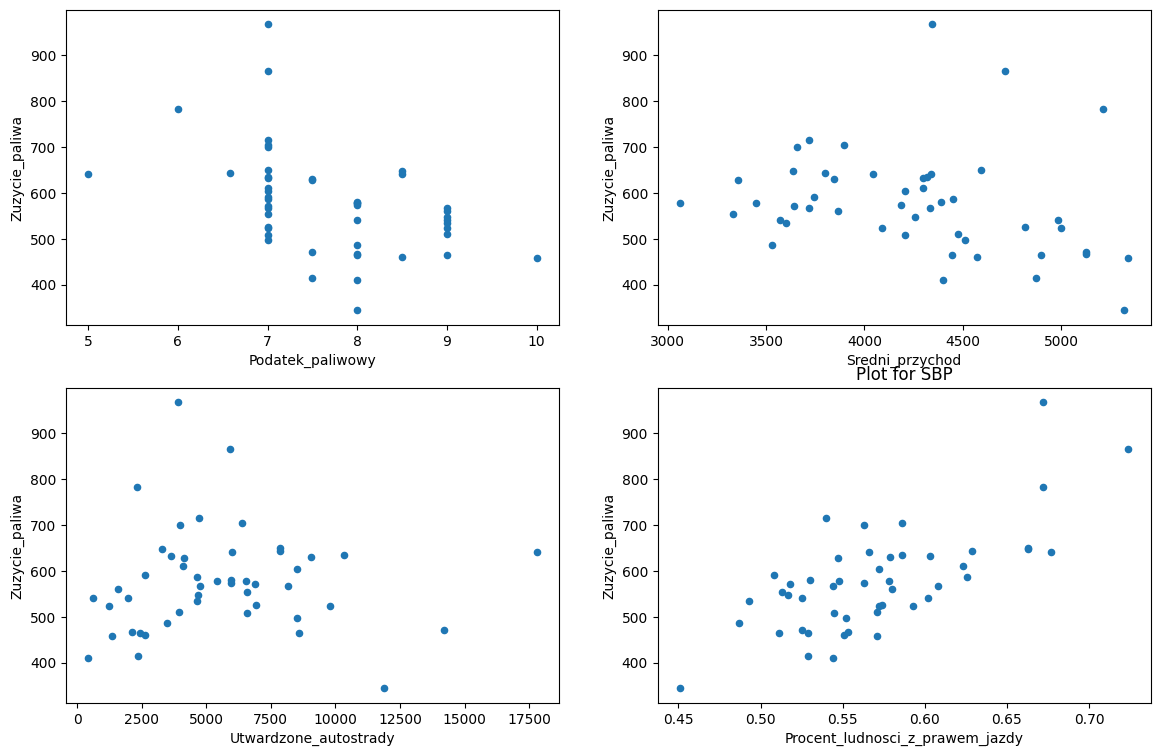

In [500]:
fig, ax = plt.subplots(2, 2, figsize=(14, 9))
petrol.plot.scatter(ax = ax[0][0], x = 'Podatek_paliwowy', y='Zuzycie_paliwa')
petrol.plot.scatter(ax = ax[0][1], x = 'Sredni_przychod', y='Zuzycie_paliwa')
petrol.plot.scatter(ax = ax[1][0], x = 'Utwardzone_autostrady', y='Zuzycie_paliwa')
petrol.plot.scatter(ax = ax[1][1], x = 'Procent_ludnosci_z_prawem_jazdy', y='Zuzycie_paliwa')
plt.title('Plot for SBP')
plt.show()

In [501]:
x = petrol.drop(columns='Zuzycie_paliwa')
y = petrol[['Zuzycie_paliwa']]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.3, random_state=0)

In [ ]:
linearRegression = linear_model.LinearRegression()
linearRegression.fit(X_train, Y_train)

In [503]:
coefficient = linearRegression.coef_
intercept = linearRegression.intercept_

coefficient, intercept

(array([[-4.25828099e+01, -9.64961393e-02, -3.99171321e-03,
          1.64357272e+03]]),
 array([416.46906213]))

In [504]:
Y_prediction = linearRegression.predict(X_test)

compareDataFrame = pd.DataFrame({
'Predykcja' : Y_prediction.squeeze(),
'Dane' : Y_test.to_numpy().squeeze(),
'Różnica' : np.abs(Y_prediction.squeeze() - Y_test.to_numpy().squeeze())
})

compareDataFrame.head()

,Predykcja,Dane,Różnica
0,477.461059,534,56.538941
1,543.703196,410,133.703196
2,622.214484,577,45.214484
3,590.951333,571,19.951333
4,704.182002,577,127.182002


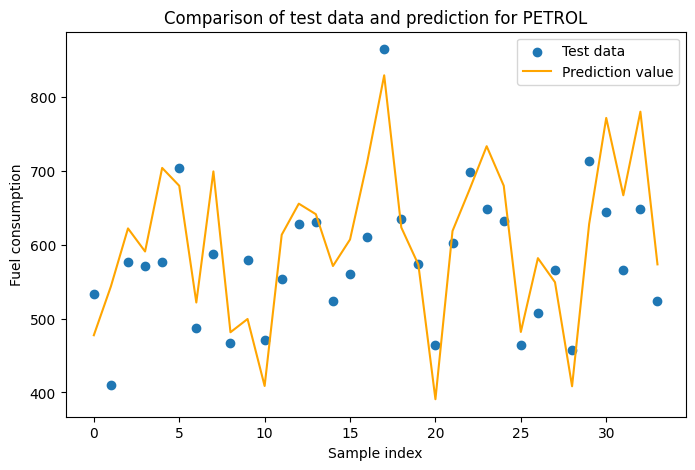

In [505]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(range(len(X_test)), Y_test.to_numpy())
plt.plot(range(len(X_test)), Y_prediction, 'orange')
ax.set_xlabel('Sample index')
ax.set_ylabel('Fuel consumption')
ax.set_title('Comparison of test data and prediction for PETROL')
ax.legend(['Test data', 'Prediction value'])
plt.show()

In [506]:
meanAbsoluteError = mean_absolute_error(Y_test.to_numpy().squeeze(), Y_prediction.squeeze())
meanSquaredError = mean_squared_error(Y_test.to_numpy().squeeze(), Y_prediction.squeeze())
sqrtMeanSquaredError = np.sqrt(meanSquaredError)

compareDataFrame = pd.DataFrame({
'Średni błąd bezwzględny' : meanAbsoluteError,
'Błąd średniokwadratowy' : meanSquaredError,
'Pierwiastek błędu średniokwadratowego' : sqrtMeanSquaredError
}, index=[0])

compareDataFrame

# Uzyskany wynik możemy uznać za średni ze względu na otrzymane wartości poniżej przedstawionych błędów. Znowu na taki wynik przekłada się zbyt mały zbiór treningowy, dodatkowo korelacja między zmienną zależną a predyktorami również może być za mała.

,Średni błąd bezwzględny,Błąd średniokwadratowy,Pierwiastek błędu średniokwadratowego
0,57.378077,4798.872015,69.273891


### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [507]:
heart = pd.read_csv('HEART.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [508]:
heart = heart.replace('?', np.NaN)
heart = heart.drop(columns=['slope', 'ca', 'thal'])
heart = heart.dropna(axis=0)
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
5,32,0,2,105,198,0,0,165,0,0.0,0


In [509]:
heart = pd.get_dummies(heart, columns = ['restecg','cp'])
heart.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,num,restecg_0,restecg_1,restecg_2,cp_1,cp_2,cp_3,cp_4
0,28,1,130,132,0,185,0,0.0,0,0,0,1,0,1,0,0
1,29,1,120,243,0,160,0,0.0,0,1,0,0,0,1,0,0
3,30,0,170,237,0,170,0,0.0,0,0,1,0,1,0,0,0
4,31,0,100,219,0,150,0,0.0,0,0,1,0,0,1,0,0
5,32,0,105,198,0,165,0,0.0,0,1,0,0,0,1,0,0


In [510]:
x = heart.drop(columns=['num       '])
y = heart[['num       ']]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.2, random_state=0)

In [ ]:
logisticRegression = linear_model.LogisticRegression()
logisticRegression.fit(X_train, Y_train)

In [512]:
Y_prediction = logisticRegression.predict(X_test)

compareDataFrame = pd.DataFrame({
'Predykcja' : Y_prediction.squeeze(),
'Dane' : Y_test.to_numpy().squeeze(),
'Zgodność' : np.abs(np.logical_and(Y_prediction.squeeze(), Y_test.to_numpy().squeeze()))
})

compareDataFrame.head()

,Predykcja,Dane,Zgodność
0,0,1,False
1,0,0,False
2,1,1,True
3,0,0,False
4,1,1,True


In [513]:
logisticRegression.score(X_test, Y_test)

0.8325358851674641

In [514]:
print(classification_report(Y_test, Y_prediction))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       137
           1       0.75      0.76      0.76        72

    accuracy                           0.83       209
   macro avg       0.81      0.82      0.82       209
weighted avg       0.83      0.83      0.83       209



In [515]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
logisticRegression = linear_model.LogisticRegression()
logisticRegression.fit(X_train_scaled, Y_train)

In [517]:
Y_prediction = logisticRegression.predict(X_test_scaled)

compareDataFrame = pd.DataFrame({
'Predykcja' : Y_prediction.squeeze(),
'Dane' : Y_test.to_numpy().squeeze(),
'Zgodność' : np.abs(np.logical_and(Y_prediction.squeeze(), Y_test.to_numpy().squeeze()))
})

compareDataFrame.head()

,Predykcja,Dane,Zgodność
0,0,1,False
1,0,0,False
2,1,1,True
3,0,0,False
4,1,1,True


In [518]:
logisticRegression.score(X_test_scaled, Y_test)

0.8133971291866029

In [519]:
print(classification_report(Y_test, Y_prediction))

# Nie zauważono większej różnicy po przeskalowaniu danych, można zauważyć że dokładność się pogorszyła o niecałe punkty procentowe.

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       137
           1       0.74      0.71      0.72        72

    accuracy                           0.81       209
   macro avg       0.79      0.79      0.79       209
weighted avg       0.81      0.81      0.81       209

